In [1]:
import ROOT
import numpy as np
import uproot3
import time
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm

Welcome to JupyROOT 6.24/02


In [2]:
root_file = "dav10.root"
file = uproot3.open(root_file)
file.keys()

[b'Truth_Vertex_PV_Selected;6',
 b'Truth_Vertex_PV_Selected;5',
 b'Reco_Vertex;4',
 b'Reco_Vertex;3',
 b'amvf;1']

In [3]:
tree_truth = file['Truth_Vertex_PV_Selected;6']
tree_reco = file['Reco_Vertex;4']
branches_truth = tree_truth.arrays(namedecode='utf-8')
branches_reco = tree_reco.arrays(namedecode='utf-8')
branches_truth.keys(), branches_reco.keys()

(dict_keys(['event_id', 'truth_vtx_vx', 'truth_vtx_vy', 'truth_vtx_vz', 'truth_particle_Id', 'truth_particle_Type', 'truth_particle_process', 'truth_particle_vx', 'truth_particle_vy', 'truth_particle_vz', 'truth_particle_vt', 'truth_particle_p', 'truth_particle_px', 'truth_particle_py', 'truth_particle_pz', 'truth_particle_m', 'truth_particle_q', 'truth_particle_eta', 'truth_particle_phi', 'truth_particle_pt', 'truth_particle_vertexPrimary', 'truth_particle_vertexSecondary', 'truth_particle_particle', 'truth_particle_generation', 'truth_particle_subParticle', 'truth_vtx_fitted_trk_d0', 'truth_vtx_fitted_trk_z0', 'truth_vtx_fitted_trk_phi', 'truth_vtx_fitted_trk_theta', 'truth_vtx_fitted_trk_qp', 'truth_vtx_fitted_trk_time', 'truth_vtx_fitted_trk_err_d0', 'truth_vtx_fitted_trk_err_z0', 'truth_vtx_fitted_trk_err_phi', 'truth_vtx_fitted_trk_err_theta', 'truth_vtx_fitted_trk_err_qp', 'truth_vtx_fitted_trk_err_time', 'truth_vtx_fitted_trk_vtxID']),
 dict_keys(['event_id', 'reco_vtx_vx', 're

In [4]:
# define variables
event_size = 10000
truth_vx, truth_vy, truth_vz = branches_truth['truth_vtx_vx'], branches_truth['truth_vtx_vy'], branches_truth['truth_vtx_vz']
reco_vx, reco_vy, reco_vz = branches_reco['reco_vtx_vx'], branches_reco['reco_vtx_vy'], branches_reco['reco_vtx_vz']
truth_d0, truth_z0, truth_phi, truth_theta, truth_qp, truth_trk_vtxid = branches_truth['truth_vtx_fitted_trk_d0'], branches_truth['truth_vtx_fitted_trk_z0'], branches_truth['truth_vtx_fitted_trk_phi'], branches_truth['truth_vtx_fitted_trk_theta'], branches_truth['truth_vtx_fitted_trk_qp'], branches_truth['truth_vtx_fitted_trk_vtxID']
reco_d0, reco_z0, reco_phi, reco_theta, reco_qp, reco_trk_vtxid  = branches_reco['reco_vtx_fitted_trk_d0'], branches_reco['reco_vtx_fitted_trk_z0'], branches_reco['reco_vtx_fitted_trk_phi'], branches_reco['reco_vtx_fitted_trk_theta'], branches_reco['reco_vtx_fitted_trk_qp'], branches_reco['reco_vtx_fitted_trk_vtxID']

In [5]:
# prepare data
truth_trk_info, reco_trk_info, truth_vtx_info, reco_vtx_info, truth_HSvtx, reco_HSvtx, truth_HStrk, reco_HStrk = [], [], [], [], [], [], [], []
num_vtx_reco, num_vtx_truth, num_trk_reco, num_trk_truth = [], [], [], []

for i in range(event_size):
    num_trk_truth_i = np.bincount(truth_trk_vtxid[i])
    truth_trk_info_tmp = np.vstack([truth_d0[i], truth_z0[i], truth_phi[i], truth_theta[i], truth_qp[i]]).transpose()
    truth_trk_info_tmp = np.split(truth_trk_info_tmp, np.cumsum(num_trk_truth_i))
    truth_trk_info_tmp = truth_trk_info_tmp[:-1]
    truth_trk_info.append(truth_trk_info_tmp)
    num_trk_truth.append(num_trk_truth_i)
    
    num_trk_reco_i = np.bincount(reco_trk_vtxid[i])
    reco_trk_info_tmp = np.vstack([reco_d0[i], reco_z0[i], reco_phi[i], reco_theta[i], reco_qp[i]]).transpose()
    reco_trk_info_tmp = np.split(reco_trk_info_tmp, np.cumsum(num_trk_reco_i))
    reco_trk_info_tmp = reco_trk_info_tmp[:-1]
    reco_trk_info.append(reco_trk_info_tmp)
    num_trk_reco.append(num_trk_reco_i)
    
    truth_vtx_i = np.vstack([truth_vx[i], truth_vy[i], truth_vz[i]]).transpose().tolist()
    truth_HSvtx.append(truth_vtx_i[0])
    truth_HStrk.append(truth_trk_info_tmp[0])
    truth_vtx_info.append(truth_vtx_i)
    num_vtx_truth.append(len(truth_vtx_i))
    
    reco_vtx_i = np.vstack([reco_vx[i], reco_vy[i], reco_vz[i]]).transpose().tolist()
    reco_pt = np.split((1/(np.abs(reco_qp[i])) * np.sin(reco_theta[i])) ** 2, np.cumsum(num_trk_reco_i))
    reco_pt = [sum(i) for i in reco_pt[:-1]]
    reco_HSvtx.append(reco_vtx_i[reco_pt.index(max(reco_pt))])
    reco_HStrk.append(reco_trk_info_tmp[reco_pt.index(max(reco_pt))])
    reco_vtx_info.append(reco_vtx_i)
    num_vtx_reco.append(len(reco_vtx_i))

## Plotting x-position, y-position, z-position, number of vertex, number of track

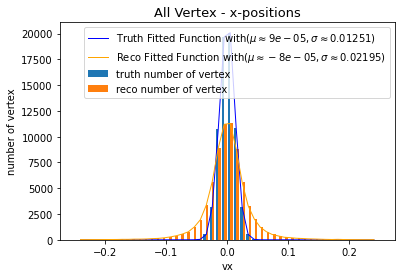

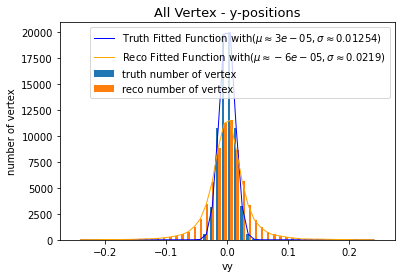

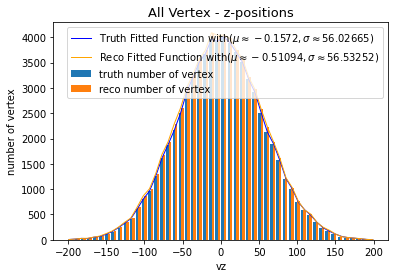

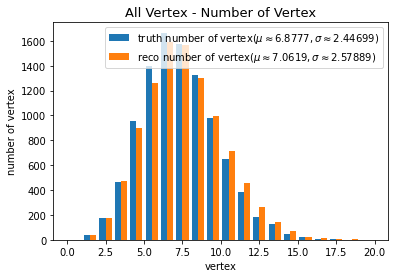

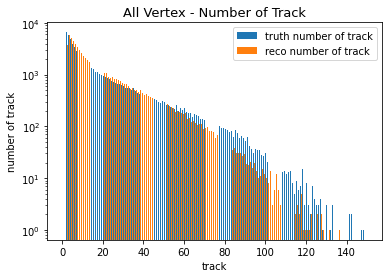

In [6]:
def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def gauss_fit(x, y):
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = scipy.optimize.curve_fit(gauss, x, y, p0=[min(y), max(y), mean, sigma])
    return popt
        
# define the plots
fig_vx, ax_vx = plt.subplots()
fig_vy, ax_vy = plt.subplots()
fig_vz, ax_vz = plt.subplots()
fig_vtx, ax_vtx = plt.subplots()
fig_trk, ax_trk = plt.subplots()
                    
# vx
ax_vx.hist([truth_vx.flatten(), reco_vx.flatten()], bins=50,
           range=(-0.25, 0.25), label=['truth number of vertex', 'reco number of vertex'])

# vx fitted function
xdata = np.linspace(-0.24, 0.24, 50)
counts, bins = np.histogram(truth_vx.flatten(), bins=50, range=(-0.25, 0.25))
H, A, x0, sigma = gauss_fit(xdata, counts)
ax_vx.plot(xdata, counts, color='blue', linewidth=1, 
           label='Truth Fitted Function with' + f'$(\mu \\approx {round(x0, 5)}, \sigma \\approx {round(np.abs(sigma), 5)})$')

counts, bins = np.histogram(reco_vx.flatten(), bins=50, range=(-0.25, 0.25))
H, A, x0, sigma = gauss_fit(xdata, counts)
ax_vx.plot(xdata, counts, color='orange', linewidth=1,
           label='Reco Fitted Function with' + f'$(\mu \\approx {round(x0, 5)}, \sigma \\approx {round(np.abs(sigma), 5)})$')

# vy
ax_vy.hist([truth_vy.flatten(), reco_vy.flatten()], bins=50, 
           range=(-0.25, 0.25), label=['truth number of vertex', 'reco number of vertex'])

# vy fitted function
xdata = np.linspace(-0.24, 0.24, 50)
counts, bins = np.histogram(truth_vy.flatten(), bins=50, range=(-0.25, 0.25))
H, A, x0, sigma = gauss_fit(xdata, counts)
ax_vy.plot(xdata, counts, color='blue', linewidth=1, 
           label='Truth Fitted Function with' + f'$(\mu \\approx {round(x0, 5)}, \sigma \\approx {round(np.abs(sigma), 5)})$')

counts, bins = np.histogram(reco_vy.flatten(), bins=50, range=(-0.25, 0.25))
H, A, x0, sigma = gauss_fit(xdata, counts)
ax_vy.plot(xdata, counts, color='orange', linewidth=1,
           label='Reco Fitted Function with' + f'$(\mu \\approx {round(x0, 5)}, \sigma \\approx {round(np.abs(sigma), 5)})$')

# vz
ax_vz.hist([truth_vz.flatten(), reco_vz.flatten()], bins=50,
           range=(-200, 200), label=['truth number of vertex', 'reco number of vertex'])

# vz fitted function
xdata = np.linspace(-199, 199, 50)
counts, bins = np.histogram(truth_vz.flatten(), bins=50, range=(-200, 200))
H, A, x0, sigma = gauss_fit(xdata, counts)
ax_vz.plot(xdata, counts, color='blue', linewidth=1, 
           label='Truth Fitted Function with' + f'$(\mu \\approx {round(x0, 5)}, \sigma \\approx {round(np.abs(sigma), 5)})$')

counts, bins = np.histogram(reco_vz.flatten(), bins=50, range=(-200, 200))
H, A, x0, sigma = gauss_fit(xdata, counts)
ax_vz.plot(xdata, counts, color='orange', linewidth=1,
           label='Reco Fitted Function with' + f'$(\mu \\approx {round(x0, 5)}, \sigma \\approx {round(np.abs(sigma), 5)})$')

# num of vtx
mu_truth, sigma_truth = scipy.stats.norm.fit(num_vtx_truth)
mu_reco, sigma_reco = scipy.stats.norm.fit(num_vtx_reco)
ax_vtx.hist([num_vtx_truth, num_vtx_reco], bins=20, range=(0, 20), 
            label=['truth number of vertex' + f'$(\mu \\approx {round(mu_truth, 5)}, \sigma \\approx {round(np.abs(sigma_truth), 5)})$', 
                   'reco number of vertex' + f'$(\mu \\approx {round(mu_reco, 5)}, \sigma \\approx {round(np.abs(sigma_reco), 5)})$'])

# num of trk
ax_trk.hist([list(np.concatenate(num_trk_truth).flat), list(np.concatenate(num_trk_reco).flat)], bins=150,
            range=(0, 150), label=['truth number of track', 'reco number of track'])
ax_trk.set_yscale('log')


ax_vx.set_title('All Vertex - x-positions', fontsize=13)
ax_vy.set_title('All Vertex - y-positions', fontsize=13)
ax_vz.set_title('All Vertex - z-positions', fontsize=13)
ax_vtx.set_title('All Vertex - Number of Vertex', fontsize=13)
ax_trk.set_title('All Vertex - Number of Track', fontsize = 13)

ax_vx.set_xlabel('vx')
ax_vy.set_xlabel('vy')
ax_vz.set_xlabel('vz')
ax_vtx.set_xlabel('vertex')
ax_trk.set_xlabel('track')

ax_vx.set_ylabel('number of vertex')
ax_vy.set_ylabel('number of vertex')
ax_vz.set_ylabel('number of vertex')
ax_vtx.set_ylabel('number of vertex')
ax_trk.set_ylabel('number of track')

ax_vx.legend(fontsize=10, loc="upper right")
ax_vy.legend(fontsize=10, loc="upper right")
ax_vz.legend(fontsize=10, loc="upper right")
ax_vtx.legend(fontsize=10, loc="upper right")
ax_trk.legend(fontsize=10, loc="upper right")

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.text(0.25, 23000, 'mean= %.8f'%mean, fontsize=10)
#plt.text(0.25, 21000, 'standard deviation= %.4f'%stadev, fontsize=10)
plt.show()

## D0-Z0 Plot

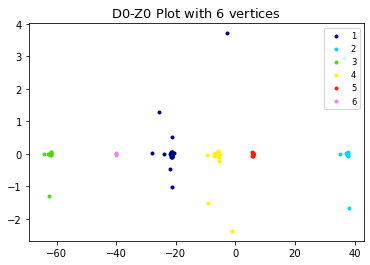

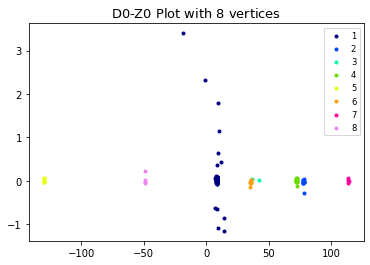

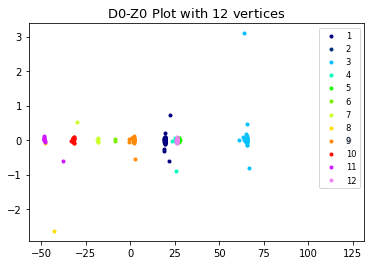

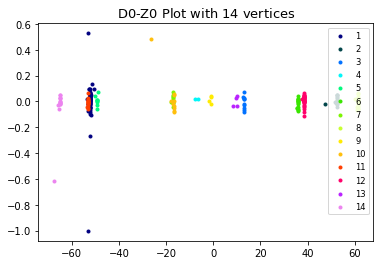

In [7]:
import matplotlib.pyplot as plt
from random import randint
import numpy as np
import matplotlib.cm as cm

#Let's generate some random X, Y data X = [ [frst group],[second group] ...]
def d0_z0(num_vtx):
    for i in range(event_size):
        if len(truth_vx[i]) == num_vtx:
            num_trk_truth_i = np.bincount(truth_trk_vtxid[i])
            truth_z0_i = np.split(truth_z0[i], np.cumsum(num_trk_truth_i))
            truth_z0_i = truth_z0_i[:-1]

            truth_d0_i = np.split(truth_d0[i], np.cumsum(num_trk_truth_i))
            truth_d0_i = truth_d0_i[:-1]
            break
    X = truth_z0_i
    Y = truth_d0_i
    labels = range(1,len(X)+1)
    colors = cm.rainbow(np.linspace(0, 1, len(X)))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for x,y,c,lab in zip(X,Y,colors,labels):
            ax.scatter(x,y,color=c,label=lab, marker='.')

    colormap = plt.cm.gist_ncar
    colorst = [colormap(i) for i in np.linspace(0, 0.9,len(ax.collections))]       
    for t,j1 in enumerate(ax.collections):
        j1.set_color(colorst[t])
    ax.set_title('D0-Z0 Plot with' + '\t' + f'${num_vtx}$ vertices' , fontsize = 13)

    ax_vx.set_xlabel('z0')
    ax_vx.set_ylabel('d0')
    ax.legend(fontsize='small', loc='upper right')
    plt.show()
    
d0_z0(6)
d0_z0(8)
d0_z0(12)
d0_z0(14)

## Truth Match Fraction

mean_event= 0.9934409229049306
standard deviation_event= 0.027140979659441435


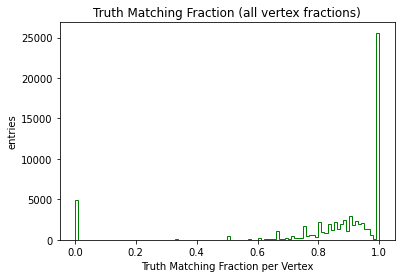

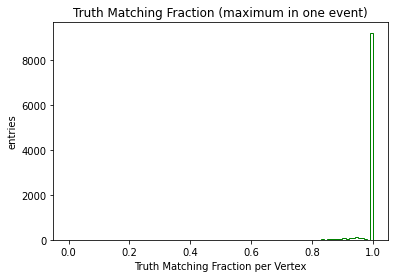

time_elapsed 33.57205271720886 seconds


In [8]:
def array_row_intersection(a,b):
    tmp=np.prod(np.swapaxes(a[:,:,None],1,2)==b,axis=2)
    return a[np.sum(np.cumsum(tmp,axis=0)*tmp==1,axis=1).astype(bool)]

time_start = time.time()

# define variables
truth_match_matrix = []

for i in range(event_size):
    truth_trk_info_i, reco_trk_info_i = truth_trk_info[i], reco_trk_info[i]
    match_matrix = np.zeros((len(truth_trk_info_i), len(reco_trk_info_i)))
    for j in range(len(truth_trk_info_i)):
        for k in range(len(reco_trk_info_i)):
            match_matrix[j, k] = len(array_row_intersection(truth_trk_info_i[j], reco_trk_info_i[k]))/len(truth_trk_info_i[j])
            
    truth_match_matrix.append(match_matrix)
    
# plotting 
fig_vtx, ax_vtx = plt.subplots()
fig_event, ax_event = plt.subplots()

m_event, m_vtx = [], []
for i in range(len(truth_match_matrix)):
    m_event.append(np.amax(truth_match_matrix[i]))
    for j in range(len(truth_match_matrix[i])):
        m_vtx.append(max(truth_match_matrix[i][j]))
        
(mean, stadev) = norm.fit(m_event)
print('mean_event=', mean)
print('standard deviation_event=', stadev)
bin = np.linspace(0, 1, 101)
ax_event.hist(m_event, bins=bin, color='green', histtype='step', label='number of vertex')
ax_vtx.hist(m_vtx, bins=bin, color='green', histtype='step')

ax_event.set_title('Truth Matching Fraction (maximum in one event)')
ax_vtx.set_title('Truth Matching Fraction (all vertex fractions)')

ax_event.set_xlabel("Truth Matching Fraction per Vertex")
ax_event.set_ylabel("entries")

ax_vtx.set_xlabel("Truth Matching Fraction per Vertex")
ax_vtx.set_ylabel("entries")

plt.show()
time_elapsed = (time.time() - time_start)
print('time_elapsed', time_elapsed, 'seconds')

## Reconstruction & Selection Efficiency
#### To successfully reconstruct a HS, 1 test is done:  `|reco(max(associated number of tracks)) - truth_HS| < 0.1 mm`
 
#### To successfully selection, 1 test is done: `Reconstructed Vertex with max(PT^2) = [max(associated number of tracks) - HS <= 0.1]`
 
#### Local pile-up density: `local pile-up density near a vertex, defined as the number of generated vertices per unit length within a symmetrical ±2 mm longitudinal window`

In [9]:
def dist_cal(list1, list2):
    dist = np.sqrt((list1[0]-list2[0])**2 + (list1[1]-list2[1])**2 + (list1[2]-list2[2])**2)
    return dist
    
def array_row_intersection(a,b):
    tmp=np.prod(np.swapaxes(a[:,:,None],1,2)==b,axis=2)
    return a[np.sum(np.cumsum(tmp,axis=0)*tmp==1,axis=1).astype(bool)]

/tmp/ipykernel_272/1431261766.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  TEff_Reco.Fill(Reco, localPUDensity_i)
/tmp/ipykernel_272/1431261766.py:35: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  TEff_Sel.Fill(Reco and Sel, localPUDensity_i)


time_elapsed: 5.809027433395386 seconds


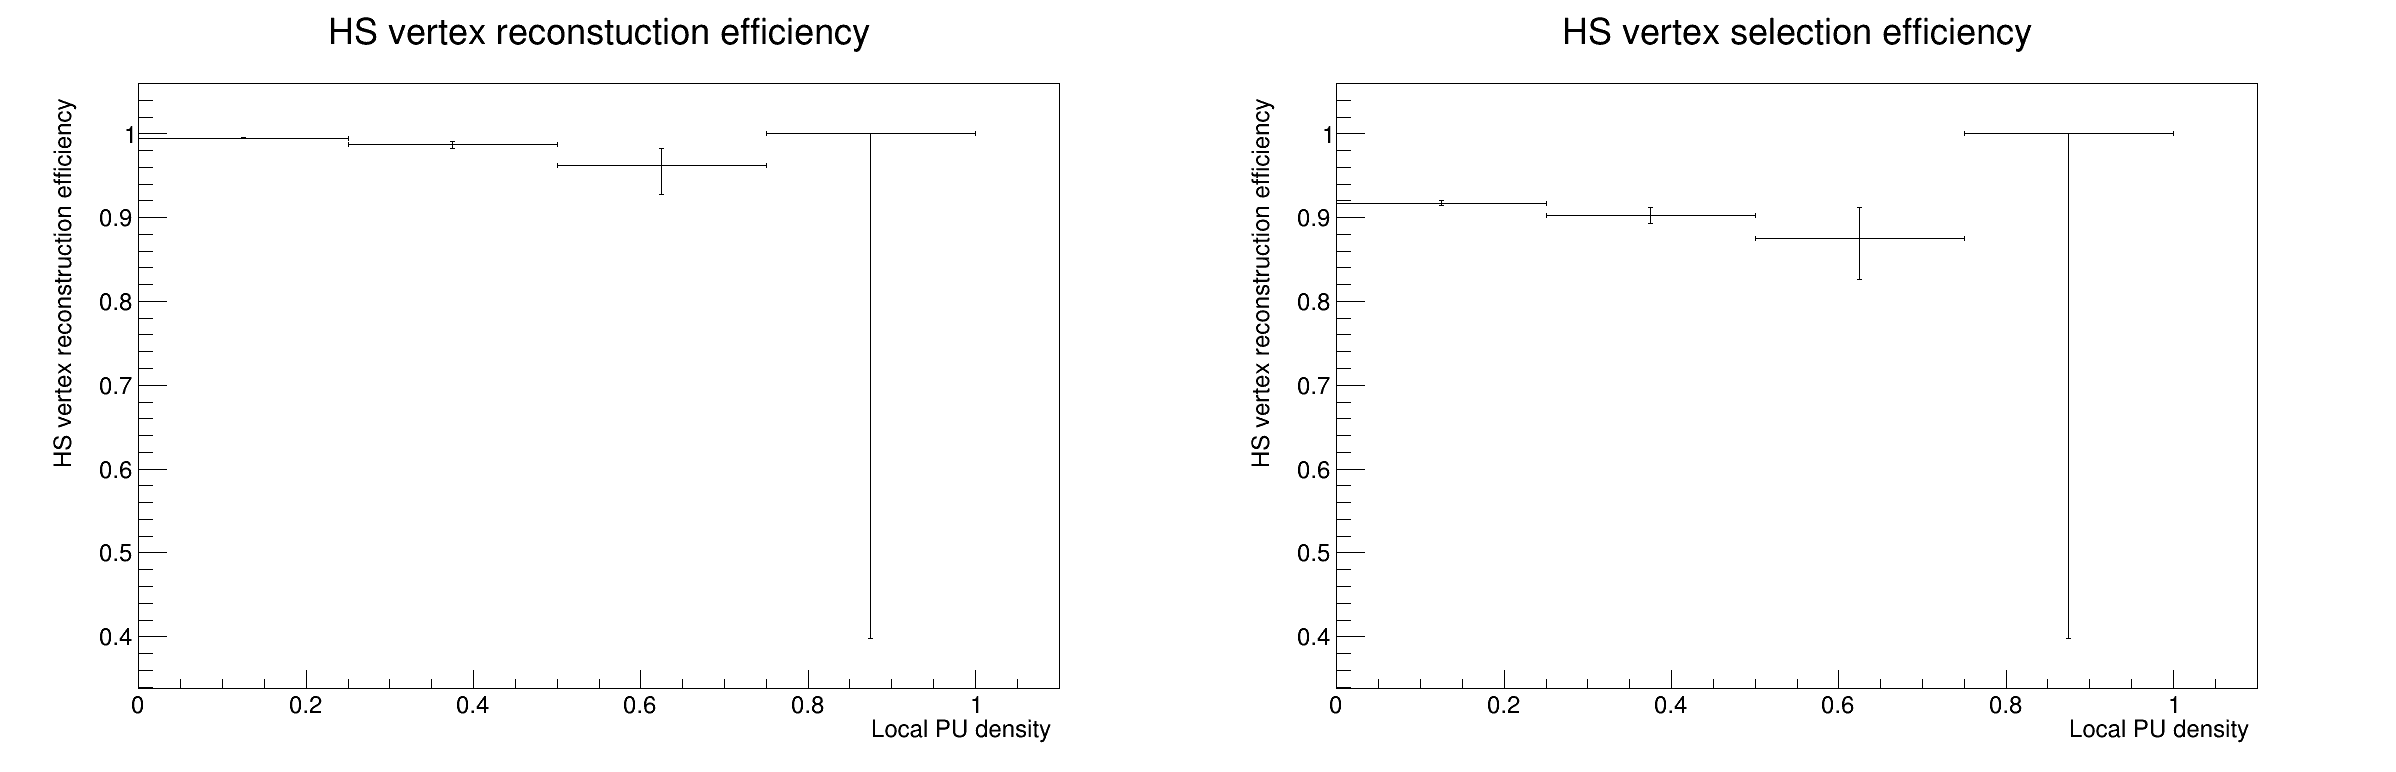

In [10]:
time_start = time.time()
c = ROOT.TCanvas("fillhist", "title1", 2400, 800)
TEff_Reco = ROOT.TEfficiency("eff", "HS vertex reconstuction efficiency;Local PU density;HS vertex reconstruction efficiency", 4, 0, 1)
TEff_Sel = ROOT.TEfficiency("eff", "HS vertex selection efficiency;Local PU density;HS vertex reconstruction efficiency", 4, 0, 1)

long_window = 2
for i in range(event_size):
    
    # Prepare the data
    truth_vtx_i, truth_HSvtx_i, truth_HStrk_i = truth_vtx_info[i], truth_HSvtx[i], truth_HStrk[i]
    reco_vtx_i, reco_trk_i, reco_HSvtx_i = reco_vtx_info[i], reco_trk_info[i], reco_HSvtx[i]
    
    # localPUDensity
    long_dist = truth_vz[i]
    long_dist = [np.abs(a-long_dist[0]) for a in long_dist[1:]] 
    nVtxInWindow = len([a for a in long_dist if a < long_window]) 
        
    localPUDensity_i = nVtxInWindow/(long_window * 2)
    
    #Reco Test
    num_trk_associated = []

    for k in range(len(reco_trk_i)):
        # trk_common = [a for a in trk_reco[i][j] if a in trk_truth[i][j]]
        num_trk_associated.append(len(array_row_intersection(truth_HStrk_i, reco_trk_i[k])))
        
    num_trk_associated, reco_vtx_i = zip(*sorted(zip(num_trk_associated, reco_vtx_i), reverse=True))
    bestRecoHSvtx_truth = reco_vtx_i[0]
    
    hs_dist = dist_cal(truth_HSvtx_i, bestRecoHSvtx_truth)

    Reco = hs_dist <= 0.1 
    Sel = bestRecoHSvtx_truth == reco_HSvtx_i
    TEff_Reco.Fill(Reco, localPUDensity_i)
    TEff_Sel.Fill(Reco and Sel, localPUDensity_i)
    
c.Divide(2, 1)
c.cd(1); TEff_Reco.Draw()
c.cd(2); TEff_Sel.Draw()
c.Draw()

time_elapsed = (time.time() - time_start)
print('time_elapsed:',time_elapsed, 'seconds')